
**1. Explain the concept of batch normalization in the context of Artificial Neural Networks:**

In artificial neural networks (ANNs), especially deep neural networks (DNNs) with many layers, the distribution of inputs to each layer changes during training. This phenomenon is known as the "internal covariate shift." Batch normalization is a technique introduced by Sergey Ioffe and Christian Szegedy in 2015 to address this issue.

Batch normalization operates by normalizing the output of each layer in the network. It does this by adjusting and scaling the activations using the mean and standard deviation of the activations within each mini-batch during training. This normalization ensures that the inputs to each layer remain within a similar range throughout training, stabilizing the training process and improving convergence. Essentially, it helps to maintain the inputs' distribution to each layer, making it easier for the network to learn and reducing the risk of vanishing or exploding gradients.

**2. Describe the benefits of using batch normalization during training:**

The benefits of batch normalization during training include:

- **Faster convergence:** By stabilizing the training process and reducing internal covariate shift, batch normalization accelerates convergence. Networks typically require fewer epochs to reach convergence when batch normalization is applied.

- **Improved gradient flow:** Batch normalization helps to mitigate the vanishing and exploding gradient problems by ensuring that the gradients propagated through the network during backpropagation remain within a reasonable range. This enables more stable and effective learning.

- **Regularization:** Batch normalization acts as a form of regularization by adding noise to the activations within each mini-batch. This noise helps prevent overfitting and reduces the dependence on other regularization techniques like dropout.

- **Enable higher learning rates:** Batch normalization allows for the use of higher learning rates without causing instability during training. This can lead to faster learning and better performance, especially in deep neural networks.

**3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters:**

The working principle of batch normalization involves two main steps: normalization and learnable parameters.

- **Normalization step:** During training, for each mini-batch, batch normalization normalizes the activations of each layer by subtracting the mini-batch mean and dividing by the mini-batch standard deviation. Mathematically, this can be expressed as:
 $  \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} $

  Here, \(x_i\) represents the input to the layer for each example in the mini-batch, $(\mu_B) $ is the mean of the mini-batch, $ (\sigma_B) $ is the standard deviation of the mini-batch, and ( $ \epsilon $ ) is a small constant added for numerical stability.

- **Learnable parameters:** In addition to normalization, batch normalization introduces two learnable parameters per activation: scale ( $ \gamma $ ) and shift ($ (\beta) $). These parameters allow the model to scale and shift the normalized activations if necessary. The output of batch normalization for each activation can be expressed as:
 $   y_i = \gamma \hat{x}_i + \beta  $

  During training, these parameters are learned through backpropagation along with the other network parameters. In practice, batch normalization is typically applied before the activation function in each layer.

### Implementation

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# loading the cifar10 dataset
(x_train , y_train) , (x_test , y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.dtype

dtype('uint8')

In [5]:
# now normalizing the pixel values to range in [0 ,1]

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# one-hot encode the labels

y_train = to_categorical(y_train , num_classes = 10)
y_test = to_categorical(y_test , num_classes = 10)

In [6]:
x_train.shape

(50000, 32, 32, 3)

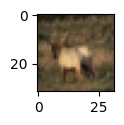

In [7]:
plt.figure(figsize = (1,1))
plt.imshow(x_train[3])

## Step 2 implement a simple feedforward Nearal Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense

# create a simple feedForward NN

model = Sequential([
    Flatten(input_shape = (32 ,32 ,3) , name = 'InputLayer'),
    Dense(40 , activation = 'relu', name = 'Hiddenlayer1'),
    Dense(20 , activation = 'relu', name = 'Hiddenlayer2'),
    Dense(10 , activation = 'softmax' , name = 'Outputlayer')
       ])

# compile the model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 3072)              0         
                                                                 
 Hiddenlayer1 (Dense)        (None, 40)                122920    
                                                                 
 Hiddenlayer2 (Dense)        (None, 20)                820       
                                                                 
 Outputlayer (Dense)         (None, 10)                210       
                                                                 
Total params: 123950 (484.18 KB)
Trainable params: 123950 (484.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### step 3  train the model without batch Normalization

In [9]:
history_without_bn = model.fit(x_train , y_train , epochs = 10 , batch_size = 30 , validation_data = (x_test , y_test))

Epoch 1/10
1667/1667 [==============================] - 10s 6ms/step - loss: 1.9758 - accuracy: 0.2733 - val_loss: 1.8889 - val_accuracy: 0.3165
Epoch 2/10
1667/1667 [==============================] - 8s 5ms/step - loss: 1.8440 - accuracy: 0.3321 - val_loss: 1.8474 - val_accuracy: 0.3250
Epoch 3/10
1667/1667 [==============================] - 4s 3ms/step - loss: 1.8052 - accuracy: 0.3470 - val_loss: 1.8454 - val_accuracy: 0.3356
Epoch 4/10
1667/1667 [==============================] - 4s 2ms/step - loss: 1.7849 - accuracy: 0.3547 - val_loss: 1.7670 - val_accuracy: 0.3614
Epoch 5/10
1667/1667 [==============================] - 4s 2ms/step - loss: 1.7727 - accuracy: 0.3604 - val_loss: 1.7514 - val_accuracy: 0.3645
Epoch 6/10
1667/1667 [==============================] - 4s 3ms/step - loss: 1.7618 - accuracy: 0.3657 - val_loss: 1.7964 - val_accuracy: 0.3449
Epoch 7/10
1667/1667 [==============================] - 4s 2ms/step - loss: 1.7530 - accuracy: 0.3664 - val_loss: 1.7525 - val_accuracy

## Implementing batch normalization layers

In [10]:
from tensorflow.keras.layers import BatchNormalization

model_bn = Sequential([
        Flatten(input_shape = (32,32,3) , name = 'inputLayer'),
        Dense(40 , activation='relu'),
        Dense(20 , activation ='relu'),
        Dense(10 , activation = 'softmax')
    ])

#compile the model

model_bn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_bn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 40)                122920    
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 123950 (484.18 KB)
Trainable params: 123950 (484.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Train the model with batch normalization
history_with_bn = model_bn.fit(x_train, y_train, epochs=10, batch_size=30, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9453 - accuracy: 0.2918 - val_loss: 1.8391 - val_accuracy: 0.3407
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8079 - accuracy: 0.3459 - val_loss: 1.7528 - val_accuracy: 0.3681
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7668 - accuracy: 0.3619 - val_loss: 1.7441 - val_accuracy: 0.3648
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7341 - accuracy: 0.3708 - val_loss: 1.7523 - val_accuracy: 0.3661
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7192 - accuracy: 0.3778 - val_loss: 1.7020 - val_accuracy: 0.3790
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7000 - accuracy: 0.3839 - val_loss: 1.7247 - val_accuracy: 0.3776
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6884 - accuracy: 0.3888 - val_loss: 1.6886 - val_accuracy:

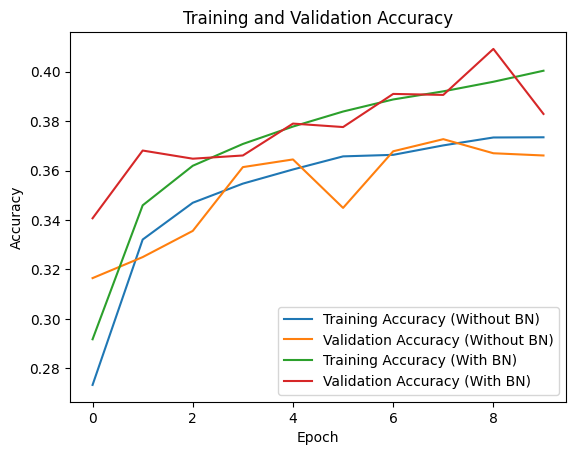

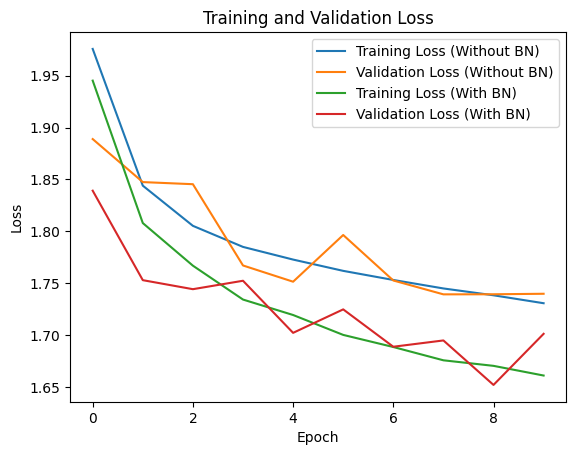

In [12]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_without_bn.history['accuracy'], label='Training Accuracy (Without BN)')
plt.plot(history_without_bn.history['val_accuracy'], label='Validation Accuracy (Without BN)')
plt.plot(history_with_bn.history['accuracy'], label='Training Accuracy (With BN)')
plt.plot(history_with_bn.history['val_accuracy'], label='Validation Accuracy (With BN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_without_bn.history['loss'], label='Training Loss (Without BN)')
plt.plot(history_without_bn.history['val_loss'], label='Validation Loss (Without BN)')
plt.plot(history_with_bn.history['loss'], label='Training Loss (With BN)')
plt.plot(history_with_bn.history['val_loss'], label='Validation Loss (With BN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
